In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


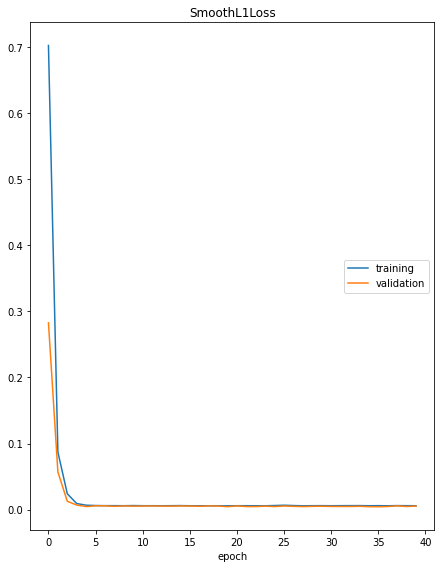

Epoch[40/40]: 100%|██████████| 40/40 [00:04<00:00,  9.76it/s, SmoothL1Loss=0.00581, MAE=0.378, RegLoss=0, MAE_val=0.402, SmoothL1Loss_val=0.00534]


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
0,0.702580,5.609616,0.0,0.282733,3.232555
1,0.087125,1.687627,0.0,0.056940,1.474290
2,0.023924,0.863691,0.0,0.012513,0.667900
3,0.009141,0.523072,0.0,0.006851,0.453360
4,0.006653,0.418472,0.0,0.004612,0.347700


In [3]:
m = NeuralProphet()
metrics = m.fit(df, freq="D", plot_live_loss=True, validate_each_epoch=0.1)
metrics.head()

In [4]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
future.tail()

,ds,y,t,y_scaled
3265,2017-01-15,NaN,1.397226,NaN
3266,2017-01-16,NaN,1.397646,NaN
3267,2017-01-17,NaN,1.398066,NaN
3268,2017-01-18,NaN,1.398487,NaN
3269,2017-01-19,NaN,1.398907,NaN


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat1']].tail()
# forecast.tail()

,ds,yhat1
3265,2017-01-15,8.620066
3266,2017-01-16,9.011417
3267,2017-01-17,8.778545
3268,2017-01-18,8.516325
3269,2017-01-19,8.585206


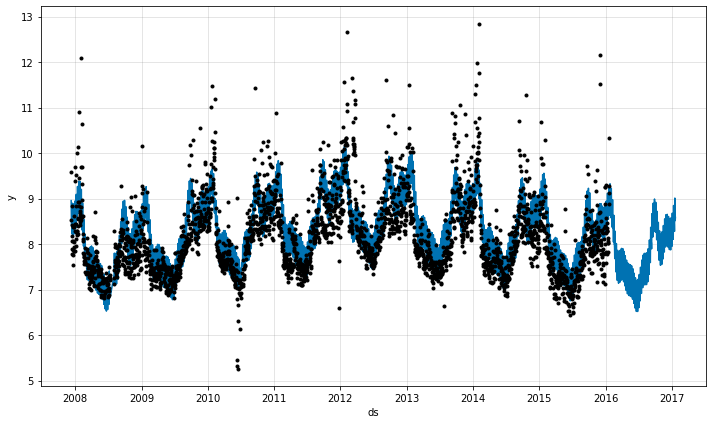

In [6]:
fig = m.plot(forecast)

In [7]:
# fig1 = m.plot_components(forecast, residuals=True)

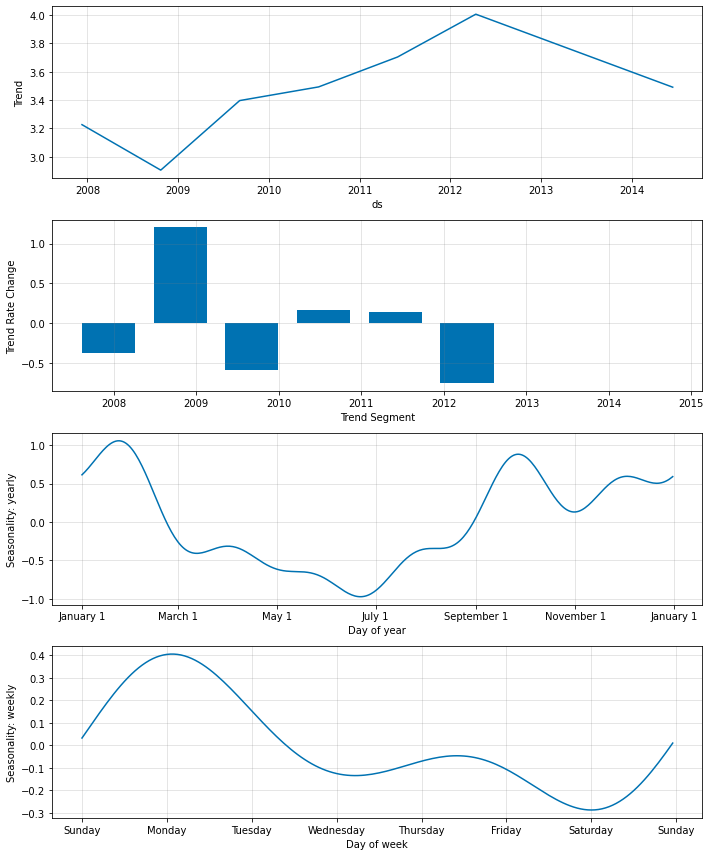

In [8]:
fig2 = m.plot_parameters()

# Adjusting Trend
## Automatic trendpoint selection

In [ ]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=1.00,
    changepoints_range=0.90,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[31/40]:  75%|███████▌  | 30/40 [00:02<00:00, 14.35it/s, SmoothL1Loss=0.00637, MAE=0.394, RegLoss=0.0023] 

In [ ]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()

We can adjust the regularization strength to get more or less points with a non-zero rate change.
Note: for too high regularization strengths, the model fitting process becomes unstable.

In [ ]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=0.20,
    changepoints_range=0.90,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

In [ ]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()

In [ ]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=2.00,
    changepoints_range=0.90,   
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

In [ ]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()